## Introduction


This notebook aims to highlight routes with high and/or increasing congestion scores from the Peak Hour Expansion Factor (PHEF) layers on Pathways for Planning and provide strategies aimed at limiting the increase in congestion along these routes and easing congestion overall. Starting with the 2018 data, the peak hour scoring has been divided into categories, with a higher number indicating the number of times a particular segment is congested per day. A minimum score of 1.5 is needed for a route to be considered congested. 1.5 = 50% more travel time along a route than the free flowing travel time. Additionally, SMART SCALE does not differentiate between PHEF values once they have exceed 5.

### Imports

In [46]:
import cartoframes
import pathways
from cartoframes.viz import Map, Layer, color_category_style
from pathways.auth import set_default_credentials
from pathways.catalog import search
import geopandas as gpd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathways.display import display_info

In [2]:
cartoframes.utils.setup_metrics(False)

### Setting up Pathways client

In [3]:
#set_default_credentials('creds.json')

### Source Datasets for Analysis

In [4]:
datasets = search('expansion')
datasets

,Id,Name,DisplayName,GeometryType
0,d59fd5a8-d375-48f7-90cc-5b4d2e9ffe44,Peak Hour Expansion Factor 2020,Peak Hour Expansion Factor 2020,LrsLine
1,55cf50b3-882b-4b8d-bbcf-7d48ea749cd3,Peak Hour Expansion Factor Weekday 2018,Peak Hour Expansion Factor Weekday 2018,LrsLine
2,7e7ba4ee-f690-46e5-a214-58b730deeec6,Peak Hour Expansion Factor Weekday 2019,Peak Hour Expansion Factor Weekday 2019,LrsLine
3,c04d3c37-2824-4ecf-81b1-8140726bb745,Peak Hour Expansion Factor Weekend 2018,Peak Hour Expansion Factor Weekend 2018,LrsLine
4,94fa7469-a435-4794-a2e5-4a5ba3f7aa32,Peak Hour Expansion Factor Weekend 2019,Peak Hour Expansion Factor Weekend 2019,LrsLine
5,22802ade-9a85-4ac8-a7d0-508f29ddd4cb,Peak Hourly Expansion Factor 2017,Peak Hourly Expansion Factor 2017,Polyline
6,00a0686e-ac15-413d-8145-9835e8718b6f,Weighted Peak Hour Expansion Factor 2018,Weighted Peak Hour Expansion Factor 2018,LrsLine
7,ce03f8e8-82d6-4d48-9b7e-d58677d9b67b,Weighted Peak Hour Expansion Factor 2019,Weighted Peak Hour Expansion Factor 2019,LrsLine


Next, we will read in the datasets that we will use for analysis, assigning each to a variable.

In [5]:

phef2018weekday_df = pathways.read_dataset('55cf50b3-882b-4b8d-bbcf-7d48ea749cd3')
phef2018weekend_df = pathways.read_dataset('c04d3c37-2824-4ecf-81b1-8140726bb745')
phef2019weekday_df = pathways.read_dataset('7e7ba4ee-f690-46e5-a214-58b730deeec6')
phef2019weekend_df = pathways.read_dataset('94fa7469-a435-4794-a2e5-4a5ba3f7aa32')
phef2020_df = pathways.read_dataset('d59fd5a8-d375-48f7-90cc-5b4d2e9ffe44')


downloading from pathways:: 28.2MB [00:26, 1.08MB/s]                                                                   
downloading from pathways:: 28.2MB [00:25, 1.11MB/s]                                                                   
downloading from pathways:: 28.2MB [00:30, 919kB/s]                                                                    
downloading from pathways:: 28.2MB [00:29, 950kB/s]                                                                    
downloading from pathways:: 26.8MB [00:24, 1.09MB/s]                                                                   


### Preparing Data for Anaylsis

To begin, we will examine the Congestion (PHEF) Score distribution in the 2018 datasets. First we will create a subset of the data that identifies routes that are considered congested and plot the data to see the distribution.

In [20]:
subset_phef2018weekday_df = phef2018weekday_df[(phef2018weekday_df.PHEF >= 1.5)]

<AxesSubplot:xlabel='PHEF', ylabel='Count'>

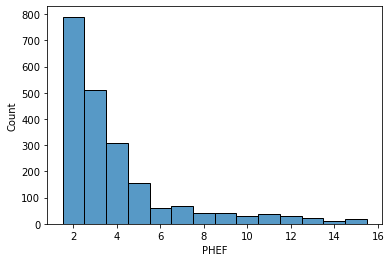

In [21]:
sns.histplot(data=subset_phef2018weekday_df, x='PHEF', binwidth = 1)

From the graph we can see that the the majority of congested routes are concentrated under 5 PHEF Score, primarily within the 1.5-4.5 Score range. However, this is only a piece of the data that we will need to analyze route congestion over time. Next we will calculate the percentage congested routes make up of the total route features.  

In [62]:
# Get a count of the number of congested routes for 2018 weekday (2126)
subset_phef2018weekday_df.count()

Shape_Length    2126
RTE_NM          2075
FROM_MEASURE    1871
TO_MEASURE      1871
TMC             2126
                ... 
AM_MAX          2126
PM_MAX          2126
AM_PHEF         2126
PM_PHEF         2126
geometry        1871
Length: 86, dtype: int64

In [63]:
# Percent of the 2018 weekday data that is congested
congested2018weekday = subset_phef2018weekday_df.count()
percent2018weekday =congested2018weekday.divide(other = 21672)
print(percent2018weekday.PHEF)

0.09809892949427833


From these calculations, we can see that the percentage of congested routes in the 2018 weekday data is 9.81%. Next we will follow the same process for the weekend 2018 data. Both feature classes have a total number of 21672 route features.

In [23]:
# Get the same count of congested routes for 2018 weekend data
subset_phef2018weekend_df = phef2018weekend_df[(phef2018weekend_df.PHEF >= 1.5)]

<AxesSubplot:xlabel='PHEF', ylabel='Count'>

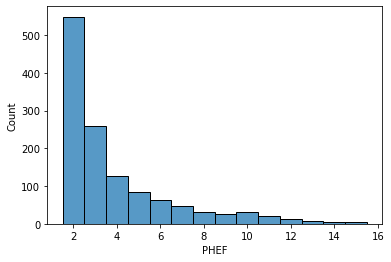

In [54]:
#Plot the distribution of congested routes
sns.histplot(data=subset_phef2018weekend_df, x='PHEF', binwidth = 1)

In [25]:
# 1267 routes are congested 
subset_phef2018weekend_df.count()

Shape_Length    1267
RTE_NM          1241
FROM_MEASURE    1088
TO_MEASURE      1088
TMC             1267
                ... 
AM_MAX          1267
PM_MAX          1267
AM_PHEF         1267
PM_PHEF         1267
geometry        1088
Length: 86, dtype: int64

In [43]:
# Percent of the 2018 weekend data that is congested
congested2018weekend = subset_phef2018weekend_df.count()
percent2018weekend =congested2018weekend.divide(other = 21672)
print(percent2018weekend.PHEF)

0.058462532299741604


Now that we have the percentages and distribution for the 2018 data we will do the same for the 2019 data. 

<AxesSubplot:xlabel='PHEF', ylabel='Count'>

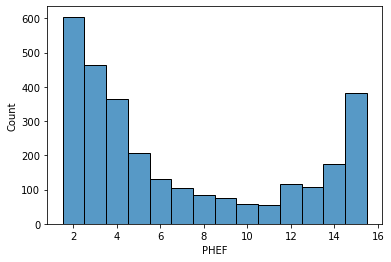

In [45]:
# Calculating 2019 weekday data
subset_phef2019weekday_df = phef2019weekday_df[(phef2019weekday_df.PHEF >= 1.5)]
sns.histplot(data=subset_phef2019weekday_df, x='PHEF', binwidth = 1)

In [61]:
# Calculating percentage of total routes that are congested
congested2019weekday = subset_phef2019weekday_df.count()
percent2019weekday =congested2019weekday.divide(other = 21672)
print(percent2019weekday.PHEF)

0.1352436323366556


<AxesSubplot:xlabel='PHEF', ylabel='Count'>

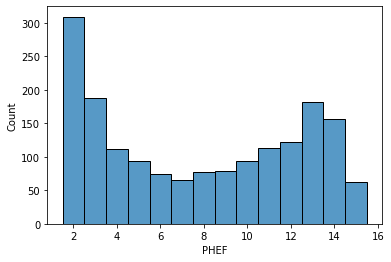

In [65]:
# Calculating 2019 weekend data
subset_phef2019weekend_df = phef2019weekend_df[(phef2019weekend_df.PHEF >= 1.5)]
sns.histplot(data=subset_phef2019weekend_df, x='PHEF', binwidth = 1)

In [66]:
# Calculating percentage of total routes that are congested
congested2019weekend = subset_phef2019weekend_df.count()
percent2019weekend =congested2019weekend.divide(other = 21672)
print(percent2019weekend.PHEF)

0.07964193429309709


### 2018-2019 comparisons

Now that we have both the 2018 and 2019 data we can begin to draw conclusions from it. First we will plot the distribution of the weekday data together.

<AxesSubplot:xlabel='PHEF', ylabel='Count'>

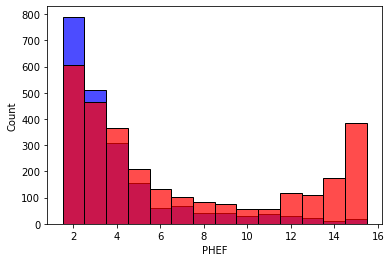

In [67]:
# Comparing 2018-2019 weekday data
# Distribution of congested routes shifts drastically
sns.histplot(data=subset_phef2018weekday_df, x='PHEF', binwidth = 1, color = 'blue', alpha =.7)
sns.histplot(data=subset_phef2019weekday_df, x='PHEF', binwidth = 1, color= 'red', alpha=.7)

The shift in the distribution of routes among the PHEF scoring categories is the most important change to note. In 2018 the largest number of congested routes is within the 1.5-2.5 score range, a relatively small peak travel time period. In 2019, while the 1.5-2.5 score category appears to remain dominant if we combine the 2019 score categories that are 5 PHEF score or above...

In [76]:
above52019weekday = phef2019weekday_df[(phef2019weekday_df.PHEF >= 5)]
above52019weekday.count()

Shape_Length    1377
RTE_NM          1365
FROM_MEASURE    1160
TO_MEASURE      1160
TMC             1377
                ... 
F9_00_PM        1377
PHEF            1377
AM_MAX          1377
PM_MAX          1377
geometry        1160
Length: 84, dtype: int64

we can see that the 5 or greater PHEF scores are significantly higher than the number of congested routes within the 1.5-2.5 PHEF score range. 

Of the 21,672 features within the 2018 and 2019 Weekday PHEF layers 2,126 (9.81%) and 2,931 (13.52%) features have been flagged as congested respectively. Since we know that there was no increase in total features, what is the cause of this increase in heavily congested routes? 

Taking a broader look at these datasets in geospatial applications we can see that the features within the 5+ PHEF score categories are relatively small when compared with less congested route features. To confirm whether this is a trend we will construct a query based around the shape_length field. 

In [79]:
# Calculating the number of highly congested routes under 100 meters in length
smallcongestedroutesweekday2019 = above52019weekday[(above52019weekday.Shape_Length <= 100)]
smallcongestedroutesweekday2019.count()

Shape_Length    981
RTE_NM          969
FROM_MEASURE    764
TO_MEASURE      764
TMC             981
               ... 
F9_00_PM        981
PHEF            981
AM_MAX          981
PM_MAX          981
geometry        764
Length: 84, dtype: int64

In [81]:
# Percentage of highly congested routes that are under 100 meters
shortcongested2019weekday = smallcongestedroutesweekday2019.count()
percentshort2019weekday =shortcongested2019weekday.divide(other = 1377)
print(percentshort2019weekday.PHEF)

0.7124183006535948


981 of the 1377 (71.2%) route segments with PHEF scores of 5 or higher were found to be 100 meters or less in length. All of which are in the immediate vicinity of an intersection. 

In [82]:
above52019weekend = phef2019weekend_df[(phef2019weekend_df.PHEF >= 5)]
above52019weekend.count()

Shape_Length    1068
RTE_NM          1056
FROM_MEASURE     900
TO_MEASURE       900
TMC             1068
                ... 
F9_00_PM        1068
PHEF            1068
AM_MAX          1068
PM_MAX          1068
geometry         900
Length: 84, dtype: int64

In [86]:
shortcongestedroutesweekend = above52019weekend[(above52019weekend.Shape_Length <= 100)]
shortcongestedroutesweekend.count()

Shape_Length    776
RTE_NM          764
FROM_MEASURE    608
TO_MEASURE      608
TMC             776
               ... 
F9_00_PM        776
PHEF            776
AM_MAX          776
PM_MAX          776
geometry        608
Length: 84, dtype: int64

In [88]:
shortcongested2019weekend = shortcongestedroutesweekend.count()
percentshort2019weekend =shortcongested2019weekend.divide(other = 1068)
print(percentshort2019weekend.PHEF)

0.7265917602996255


The 2019 Weekend data also conforms to the trend with 778 of the 1068 (72.3%) congested route segments with PHEF scores above 5 measuring 100 meters or less in length located at an intersection. 